Задание
Построить модель машинного обучения, позволяющую предсказать, является ли цветок цветком класса Ирис-Вирджиния или нет.

План решения:

1. Из библиотеки scikit-learn подгрузите данные. Мы уже работали с ними в рамках Темы 1.

In [40]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [41]:
df = load_iris(as_frame=True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Теперь создадим новое поле target_virginica и заполним его значениями, где 0 - цветок не является классом Ирис-Вирджиния, 1 - цветок принадлежит классу Ирис-Вирджиния:

In [42]:
df['target_virginica'] = np.where(df['target'] == 2, 1, 0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [43]:
display(df.groupby('target_virginica')['target'].value_counts())

target_virginica  target
0                 0         50
                  1         50
1                 2         50
Name: count, dtype: int64

2. Обучите библиотечную модель логистической регрессии на обучающей части данных.

In [44]:
X = df.drop(['target', 'target_virginica'], axis=1)
y = df['target_virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


3. Оцените качество обученной на предыдущем шаге модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

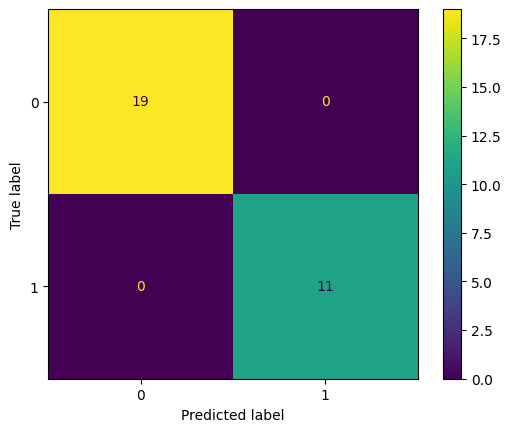

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Вывод:

Обученная модель прошла оценку по матрице ошибок со следующими показателями качества:
- полнота = 1
- точность = 1
- F1-мера = 1

4. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска. Он должен:
- инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска
- содержать метод fit для обучения модели, на вход которой будут подаваться обучающие данные
- чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp
- для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».
- должен содержаться метод predict, который будет возвращать лейбл 0/1.
- лейбл должен рассчитываться из вероятности принадлежности классу 1.
- вероятность должна рассчитываться как сигмоида от результата произведения матрицы фичей X и вектора весов модели w.

In [46]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights)
            predictions = self.sigmoid(linear_model)

            gradient = np.dot(X.T, (predictions - y)) / n_samples
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        predictions = self.sigmoid(linear_model)
        return np.where(predictions >= 0.5, 1, 0)

5. Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.

In [47]:
my_model = MyLogisticRegression(learning_rate=0.1, n_iterations=1000)
my_model.fit(X_train, y_train)

my_predictions = my_model.predict(X_test)

6. Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем у библиотечной модели.

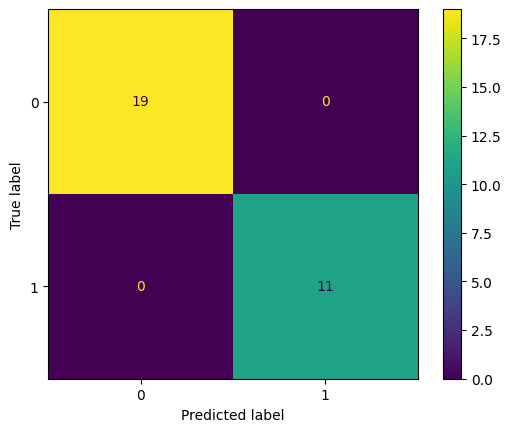

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test, my_predictions)).plot()

### Вывод:

Качество модели, обученной с помощью класса MyLogisticRegression, получилось не хуже:
- полнота = 1
- точность = 1
- F1-мера = 1

In [49]:
import numpy as np

vector1 = np.arange(1, 101)
vector2 = np.arange(100, 0, -1)

euclidean_distance = np.linalg.norm(vector1 - vector2)

print("Евклидово расстояние между векторами:", euclidean_distance)

Евклидово расстояние между векторами: 577.3214009544423


In [50]:
def gradient_descent(x, learning_rate, iterations):
    losses = []
    for i in range(iterations):
        gradient = 2*(x-10)
        x = x - learning_rate * gradient
        loss = (x-10)*2
        losses.append(loss)
        print(f"Iteration {i+1}: x = {x}, loss = {loss}")
    return x, losses

x = 0
learning_rate = 0.4
iterations = 4

final_x, losses = gradient_descent(x, learning_rate, iterations)

Iteration 1: x = 8.0, loss = -4.0
Iteration 2: x = 9.6, loss = -0.8000000000000007
Iteration 3: x = 9.92, loss = -0.16000000000000014
Iteration 4: x = 9.984, loss = -0.03200000000000003
